### CREDIT CARD FRAUD PREDICTION

PROBLEM
Crypto currencies have a highly volatile nature and makes their prices unpredictable. This volatility petrifies new entrants from entering the crypto currency markets and has caused huge losses to investors.

SOLUTION
This objective of this project is to build predictive models that can optimally predict cryptocurrency closing price with the given data

PROJECT PHASES
This data set will undergo various steps to achieve the final goal of developing a highly performing predictive model. These steps are

* Data Inspection and Wrangling
* Data Visualization
* Exploratory Data analysis
* Feature selection
* Feature Scaling
* Class Balancing using SMOTE
* Cross validation and hyperparameter tuning
* Making predictions


In [1]:
#Importing necessary libraries

import sklearn

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

In [2]:
#loading the data set
credit = pd.read_csv('creditcard.csv')

In [3]:
#viewing the first 5 rows
credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#checking the data shape
credit.shape

(284807, 31)

In [5]:
#inspecting the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the descriptive statistics
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#checking for missing values
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#checking for unique values
credit.Class.unique()

array([0, 1], dtype=int64)

In [9]:
#importing libraries for visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

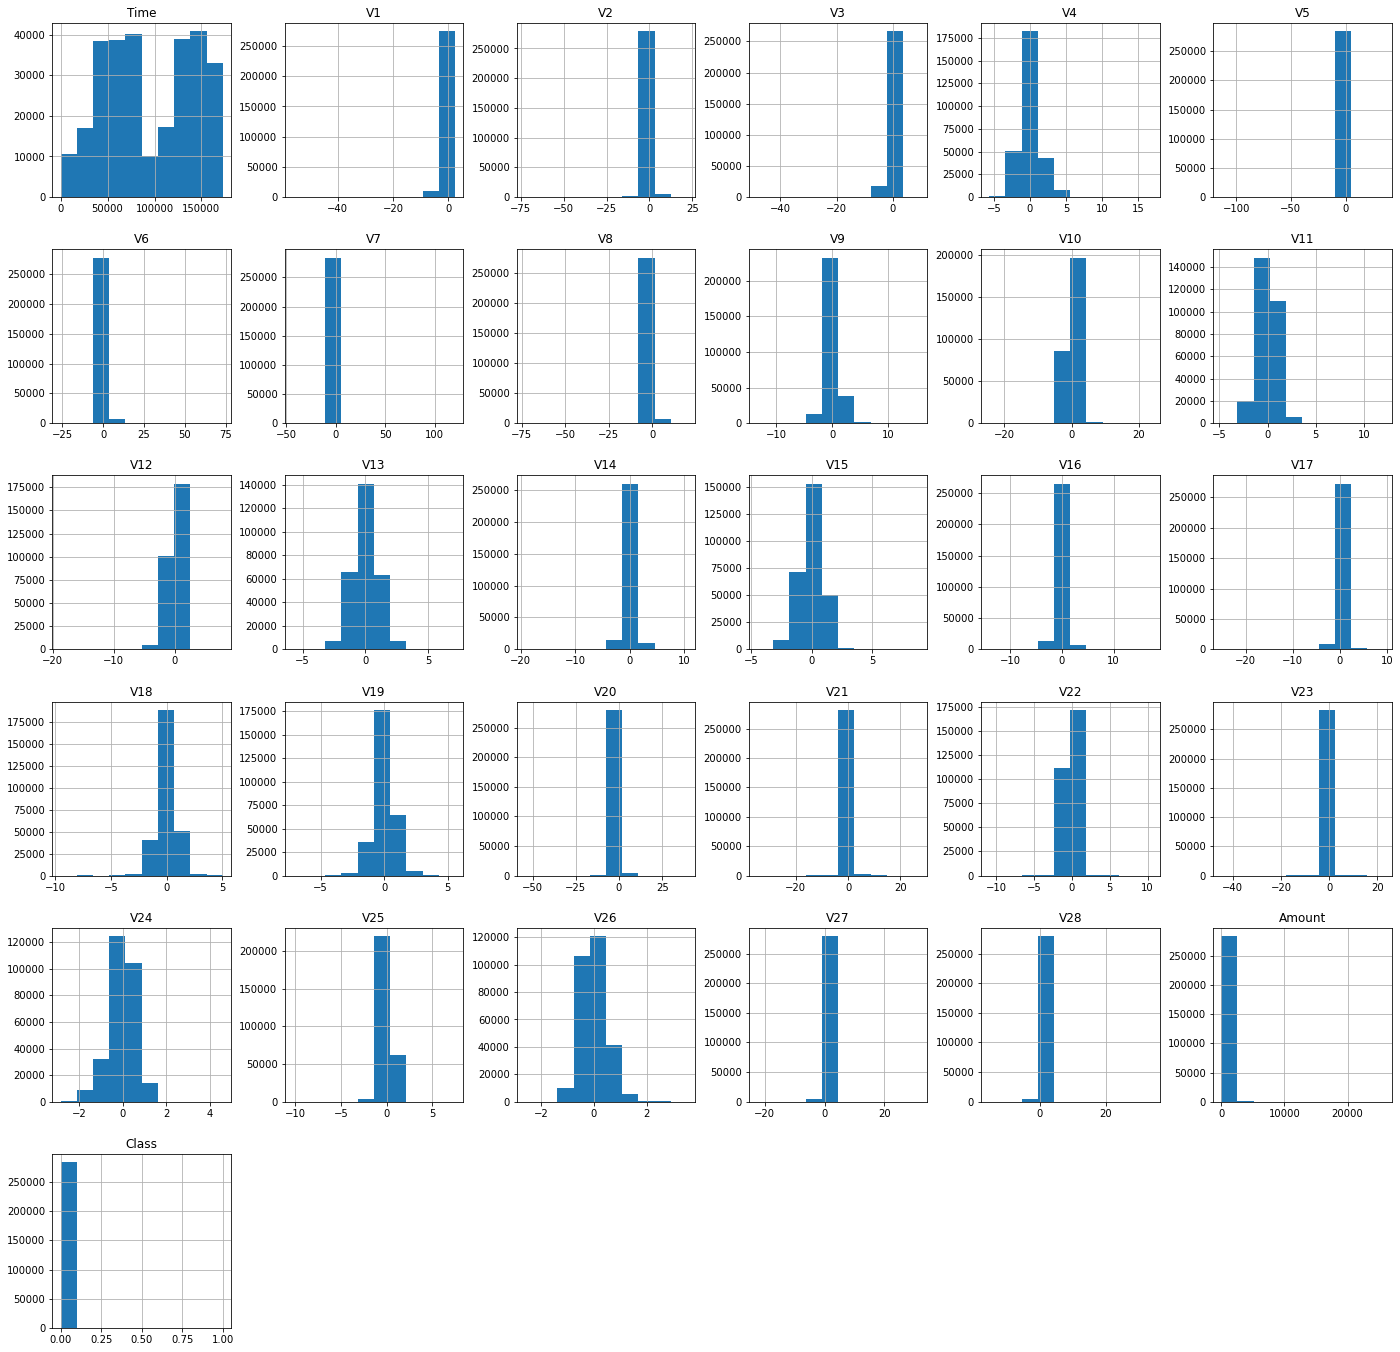

In [10]:
#plotting histograms of all variables
credit.hist(figsize=(24, 24))
plt.show()

In [11]:
#Selecting features to plot
feat_to_plot = credit[[ 'Time', 'Amount']]

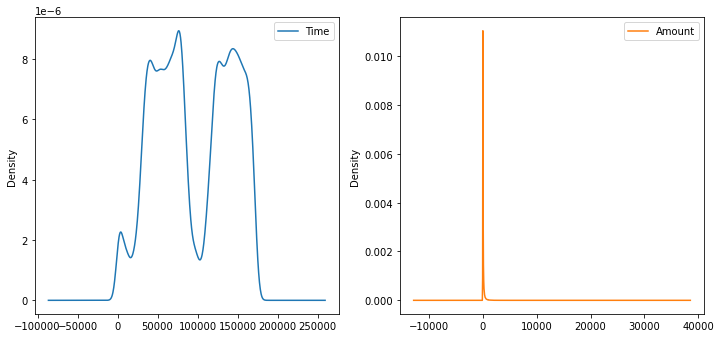

In [12]:
#Plotting density plots of selected variables
feat_to_plot.plot(kind='density', 
                   subplots=True, 
                   layout=(2, 2), 
                   sharex=False, 
                   figsize=(12, 12))

plt.show()

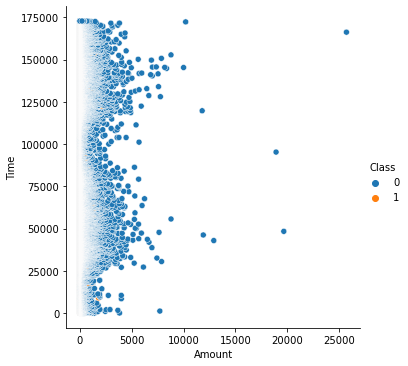

In [13]:
#visualization the target variable using a relplot
sns.relplot(data=credit, x="Amount", y="Time", hue="Class")

In [ ]:
sns.pairplot(df[['V21', 'V22']], hue= 'Class')

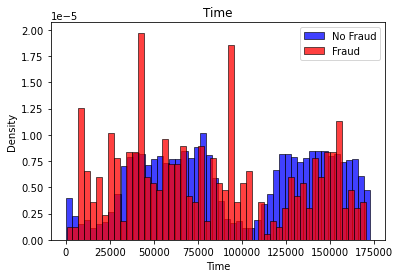

In [14]:
#visualizing the distribution of the target variable against Time
ax = plt.subplot()
sns.histplot(credit['Time'][credit.Class==0], bins=50, color="blue",stat="density")
sns.histplot(credit['Time'][credit.Class==1], bins=50, color="red",stat="density")
plt.legend(["No Fraud", "Fraud"])
ax.set_title('Time')
             
plt.show()

Time         AxesSubplot(0.125,0.826831;0.227941x0.053169)
V1        AxesSubplot(0.398529,0.826831;0.227941x0.053169)
V2        AxesSubplot(0.672059,0.826831;0.227941x0.053169)
V3           AxesSubplot(0.125,0.763028;0.227941x0.053169)
V4        AxesSubplot(0.398529,0.763028;0.227941x0.053169)
V5        AxesSubplot(0.672059,0.763028;0.227941x0.053169)
V6           AxesSubplot(0.125,0.699225;0.227941x0.053169)
V7        AxesSubplot(0.398529,0.699225;0.227941x0.053169)
V8        AxesSubplot(0.672059,0.699225;0.227941x0.053169)
V9           AxesSubplot(0.125,0.635423;0.227941x0.053169)
V10       AxesSubplot(0.398529,0.635423;0.227941x0.053169)
V11       AxesSubplot(0.672059,0.635423;0.227941x0.053169)
V12           AxesSubplot(0.125,0.57162;0.227941x0.053169)
V13        AxesSubplot(0.398529,0.57162;0.227941x0.053169)
V14        AxesSubplot(0.672059,0.57162;0.227941x0.053169)
V15          AxesSubplot(0.125,0.507817;0.227941x0.053169)
V16       AxesSubplot(0.398529,0.507817;0.227941x0.05316

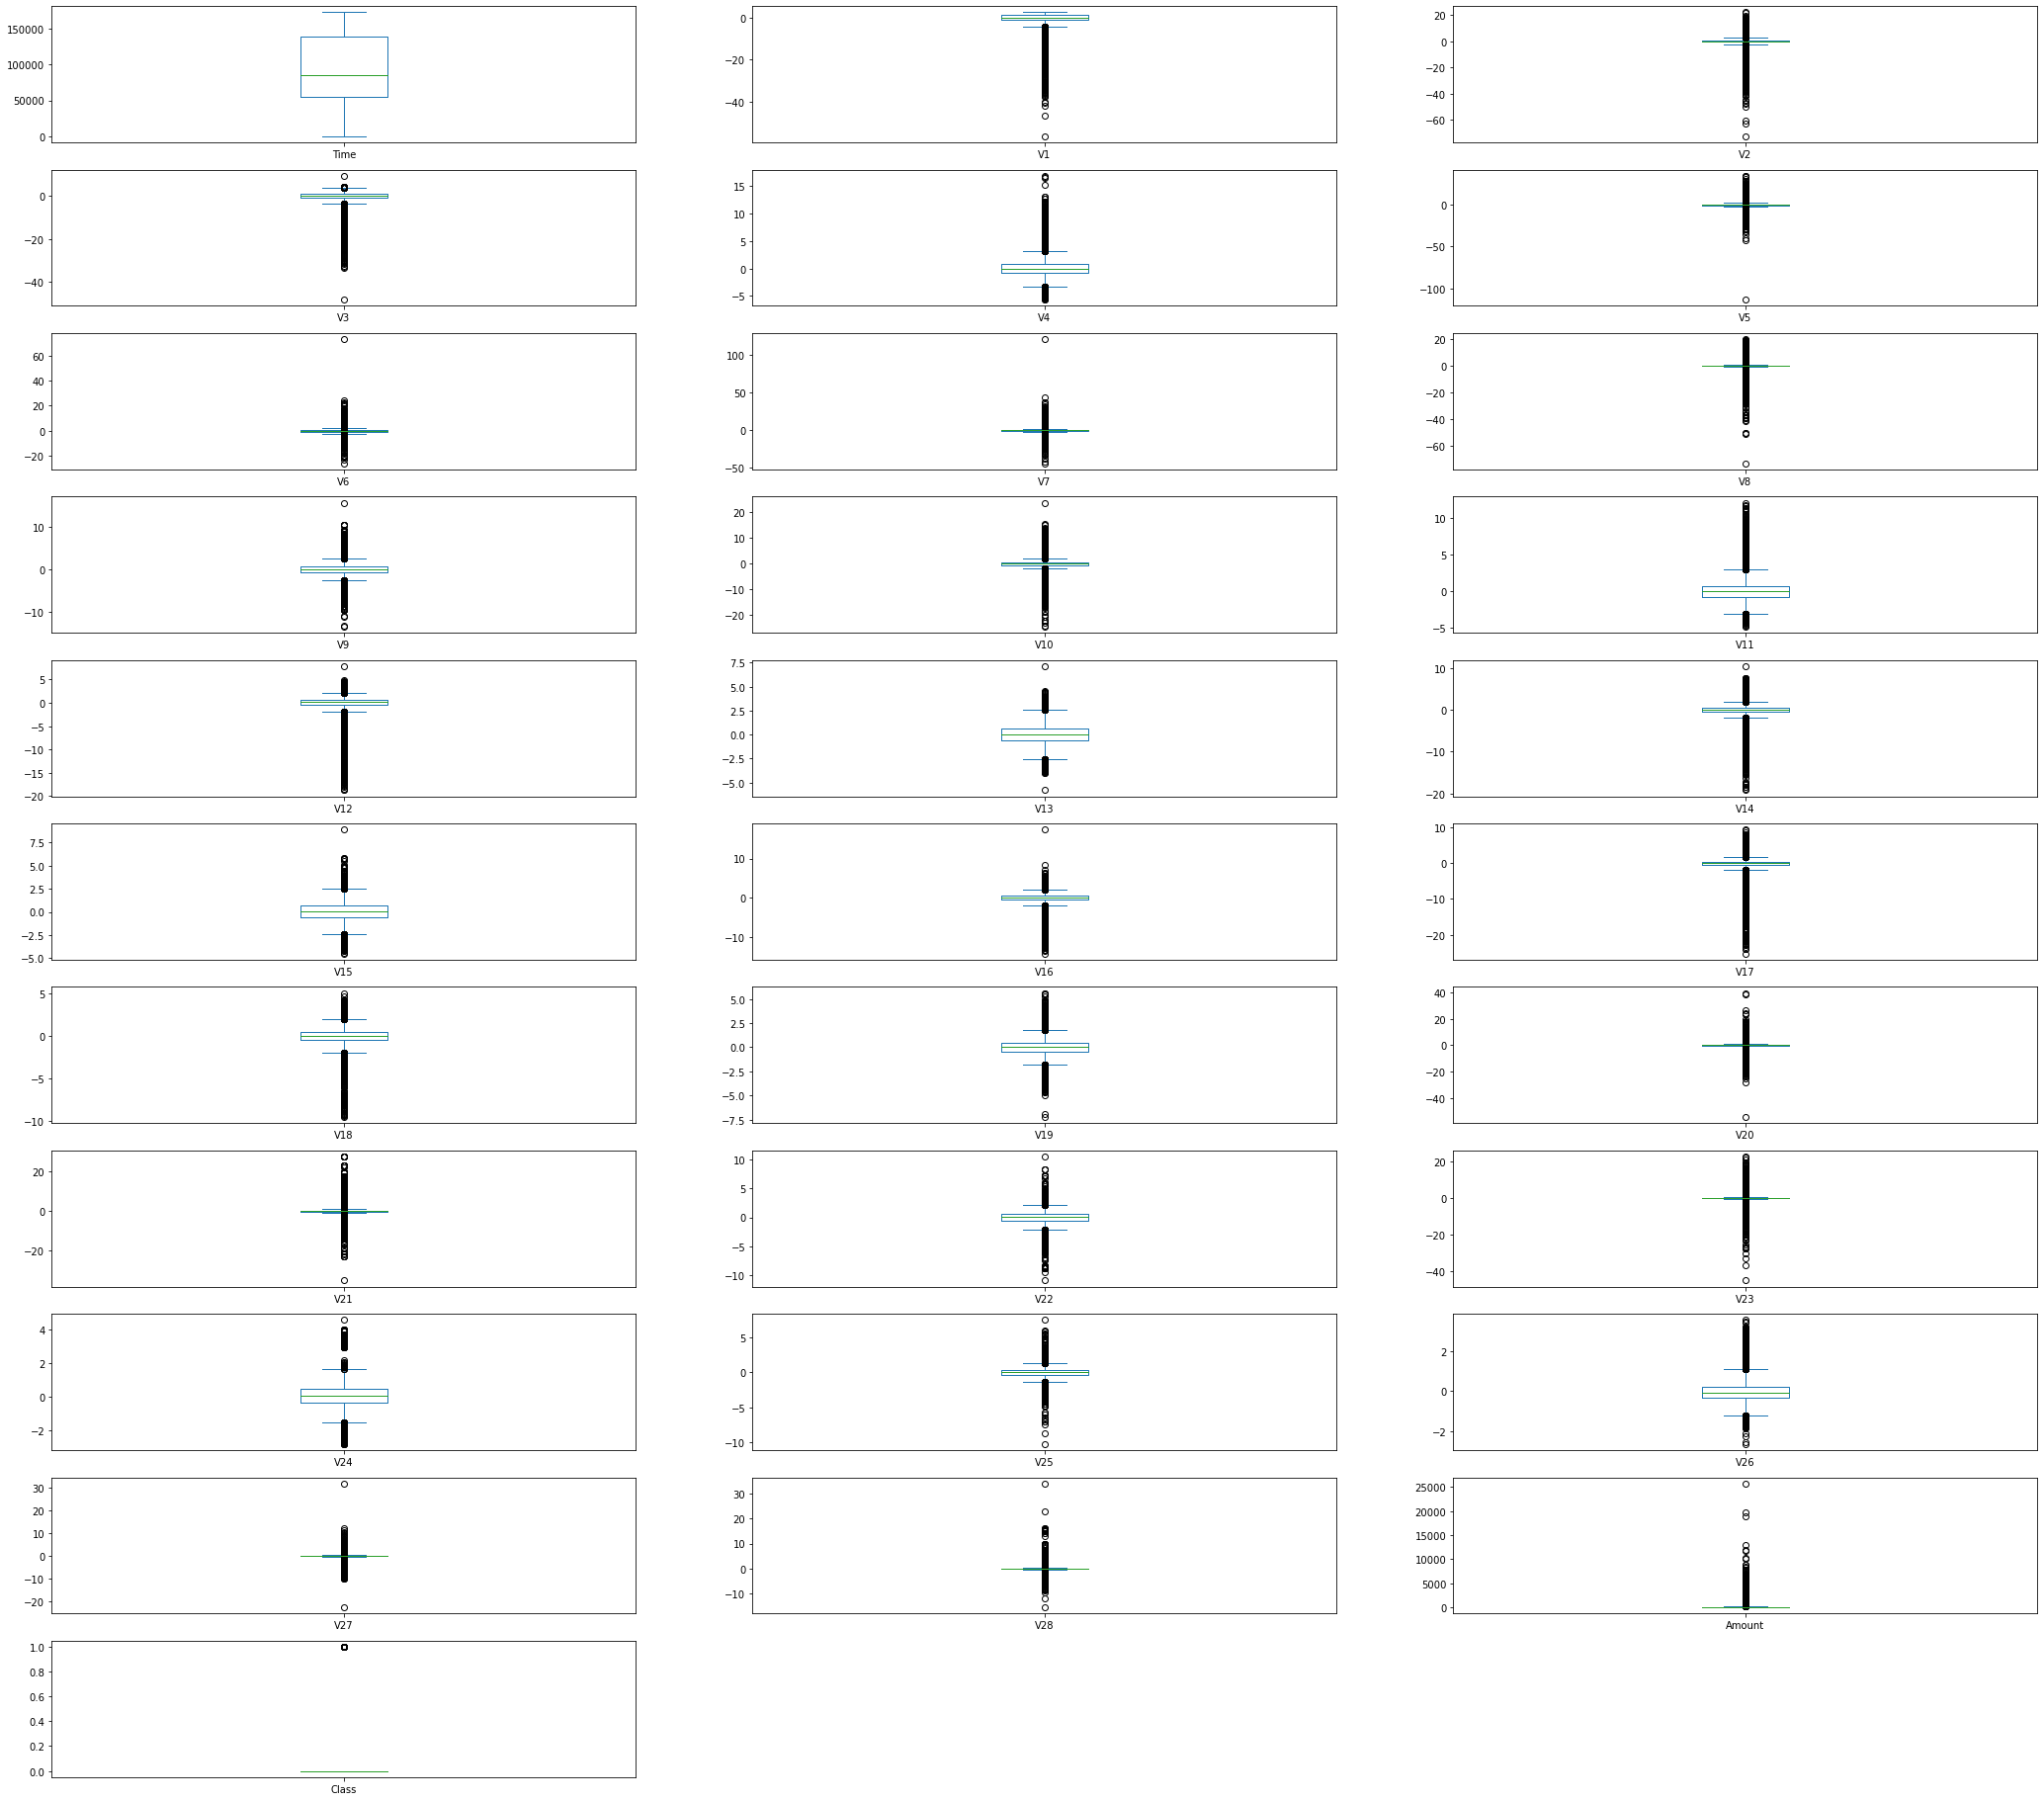

In [15]:
#Plotting box plots to visualize outliers
credit.plot(kind='box', 
                   subplots=True, 
                   layout=(12, 3), 
                   sharex=False, 
                   figsize=(36, 36))

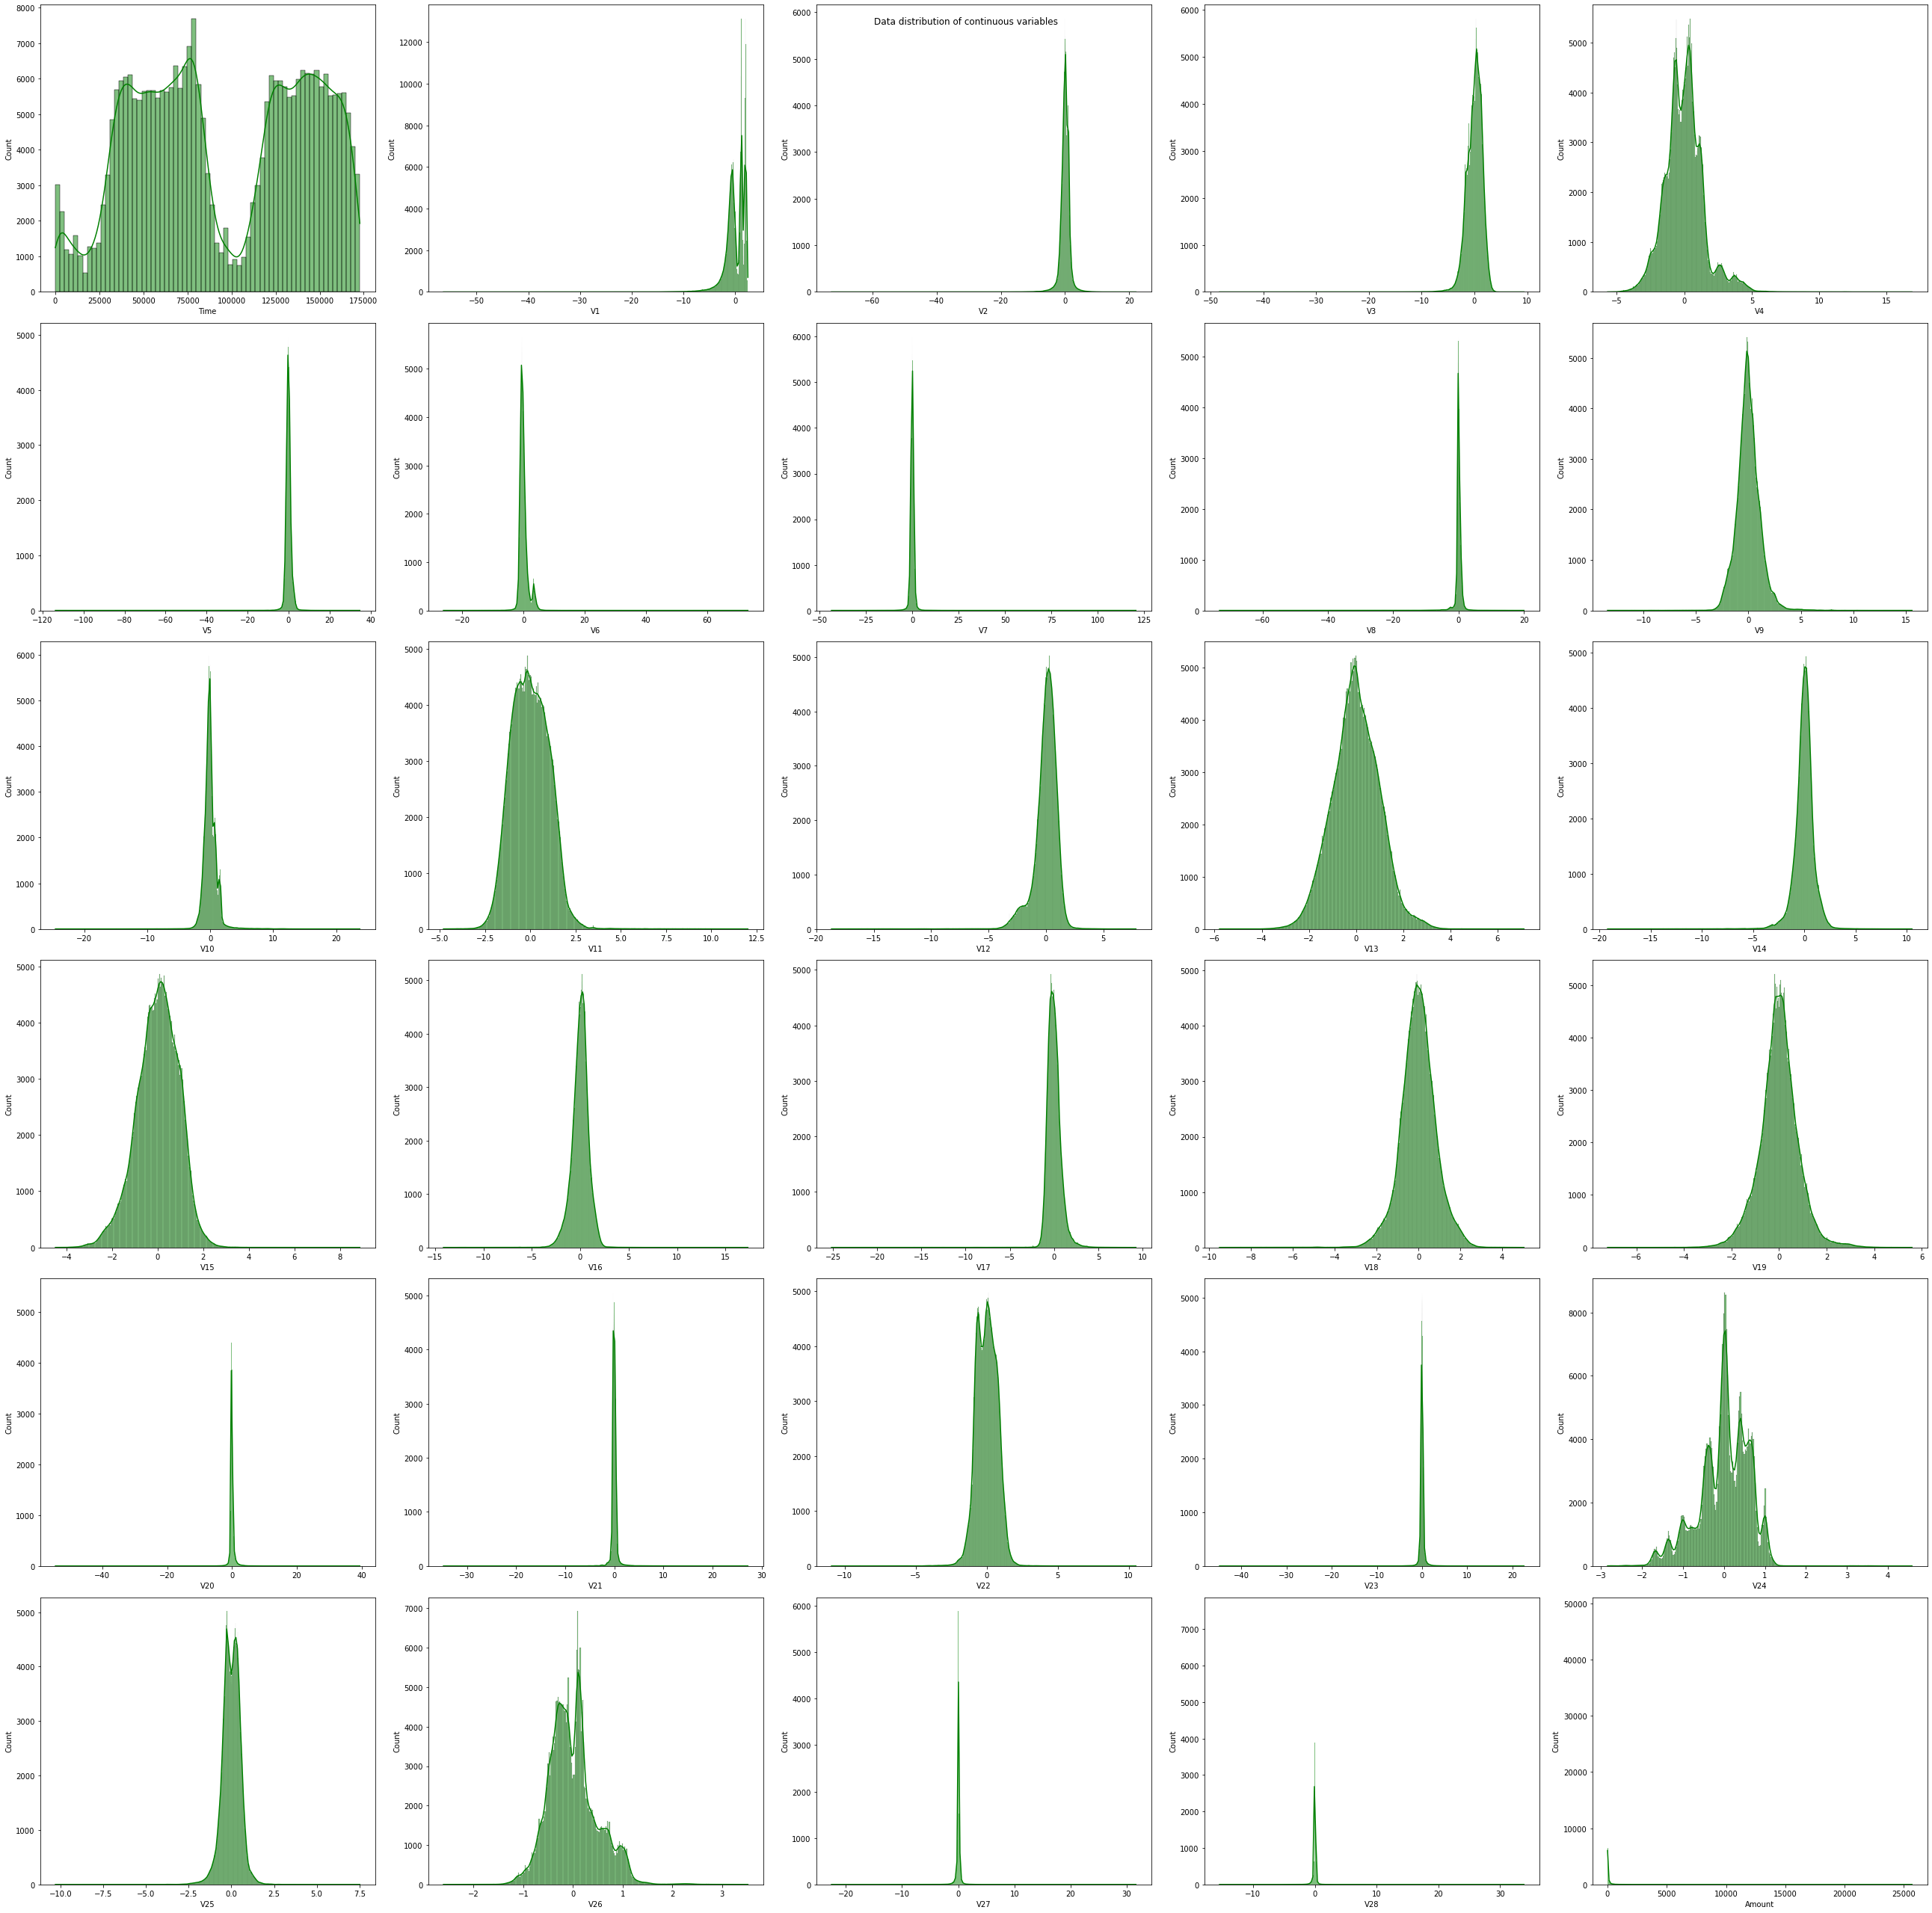

In [16]:
#Histplot of all variables before outlier treatment
plt.figure(figsize=(36, 36))
for i, col in enumerate(credit.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white' 
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=credit, x=col, ax=ax,color='green',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [17]:
#Treating outliers
def outlier_treating(data,var):
    credit=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(credit[i])#calling outlier_detector function 
        credit.loc[out_var,i]=np.median(credit[i])#replacing the outliers to the median
    return credit

In [18]:
#selecting variables with outliers
var=list(credit.select_dtypes(include=['float64']).columns)

In [19]:
#replacing outliers
credit=outlier_treating(credit,var)

In [20]:
#checking the descriptive statistics after outlier treatment
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,0.181959,1.436267,-4.274178,-0.831192,0.018109,1.315642,2.454930
V2,284807.0,0.081165,0.942255,-2.701960,-0.499840,0.065486,0.745641,2.907101
V3,284807.0,0.073230,1.306157,-3.765986,-0.821337,0.179846,1.026875,3.894346
V4,284807.0,-0.100997,1.148624,-3.235785,-0.822246,-0.019847,0.628275,3.131204
V5,284807.0,-0.044778,0.931846,-2.646763,-0.649762,-0.054336,0.515968,2.566916
V6,284807.0,-0.257460,0.755161,-2.518560,-0.755165,-0.274187,0.150336,2.148841
V7,284807.0,0.015080,0.767854,-2.240378,-0.511578,0.040103,0.536134,2.256656
V8,284807.0,0.066713,0.372279,-1.012514,-0.165016,0.022358,0.255645,1.131305
V9,284807.0,-0.045892,0.926103,-2.503304,-0.617563,-0.051429,0.531927,2.457386


Time         AxesSubplot(0.125,0.826831;0.227941x0.053169)
V1        AxesSubplot(0.398529,0.826831;0.227941x0.053169)
V2        AxesSubplot(0.672059,0.826831;0.227941x0.053169)
V3           AxesSubplot(0.125,0.763028;0.227941x0.053169)
V4        AxesSubplot(0.398529,0.763028;0.227941x0.053169)
V5        AxesSubplot(0.672059,0.763028;0.227941x0.053169)
V6           AxesSubplot(0.125,0.699225;0.227941x0.053169)
V7        AxesSubplot(0.398529,0.699225;0.227941x0.053169)
V8        AxesSubplot(0.672059,0.699225;0.227941x0.053169)
V9           AxesSubplot(0.125,0.635423;0.227941x0.053169)
V10       AxesSubplot(0.398529,0.635423;0.227941x0.053169)
V11       AxesSubplot(0.672059,0.635423;0.227941x0.053169)
V12           AxesSubplot(0.125,0.57162;0.227941x0.053169)
V13        AxesSubplot(0.398529,0.57162;0.227941x0.053169)
V14        AxesSubplot(0.672059,0.57162;0.227941x0.053169)
V15          AxesSubplot(0.125,0.507817;0.227941x0.053169)
V16       AxesSubplot(0.398529,0.507817;0.227941x0.05316

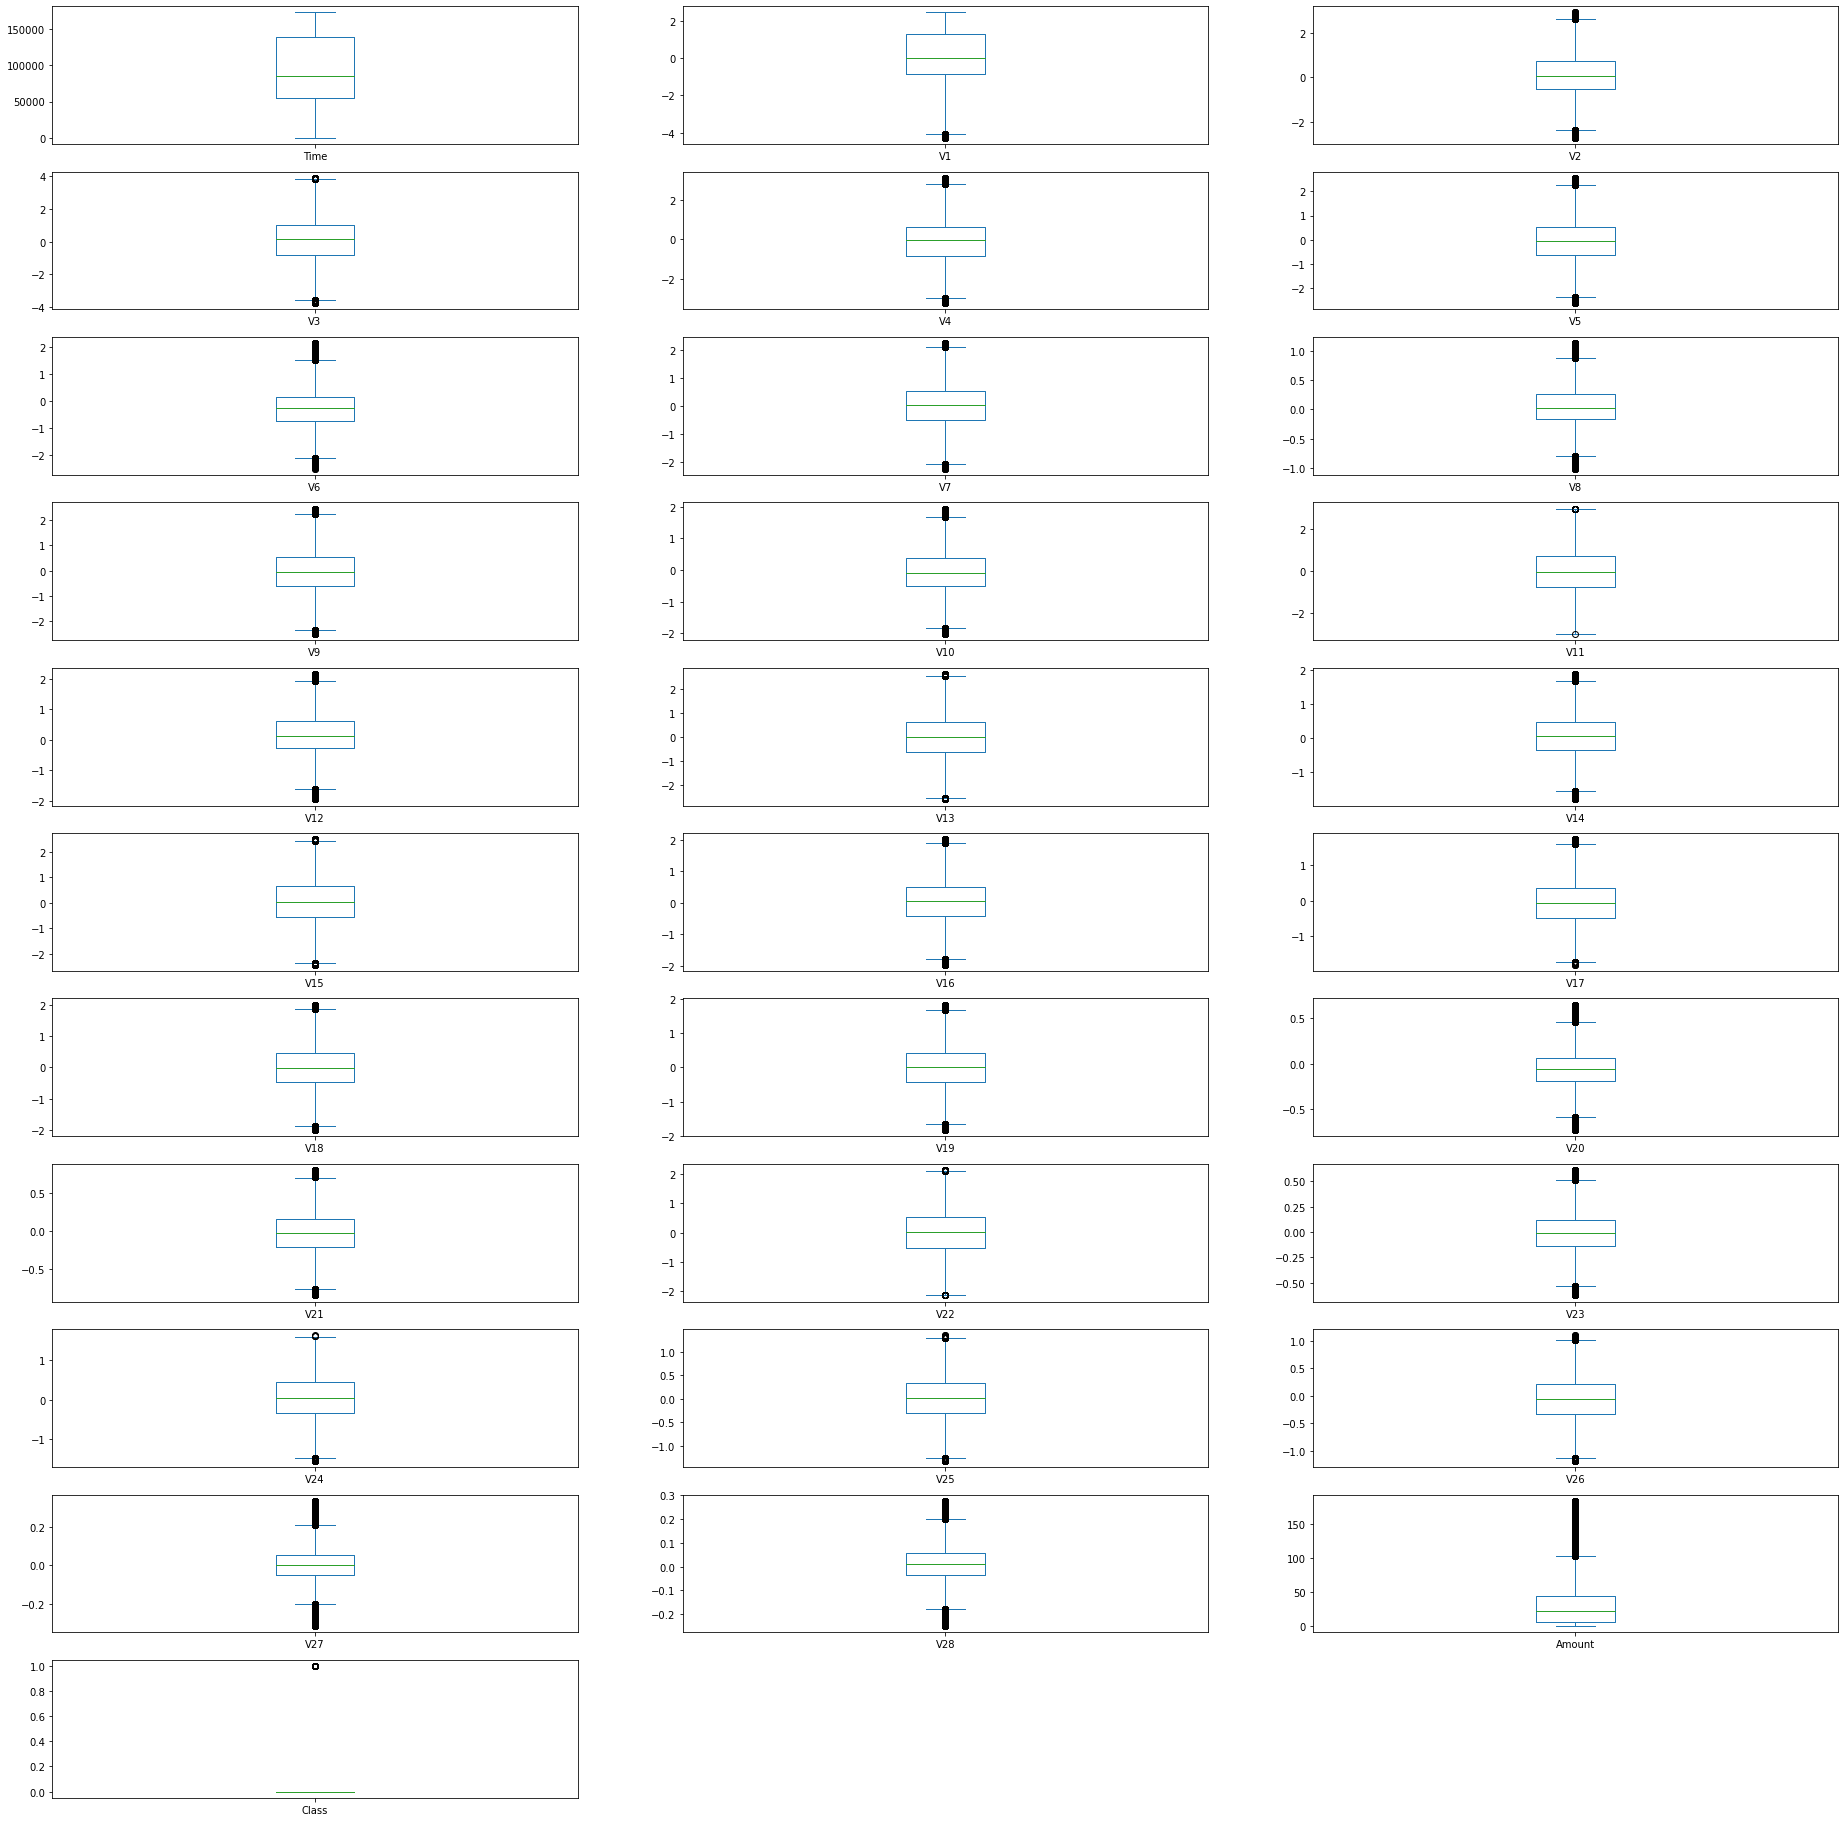

In [21]:
#Plotting box plots to confirm outliers treatment
credit.plot(kind='box', 
                   subplots=True, 
                   layout=(12, 3), 
                   sharex=False, 
                   figsize=(32, 36))

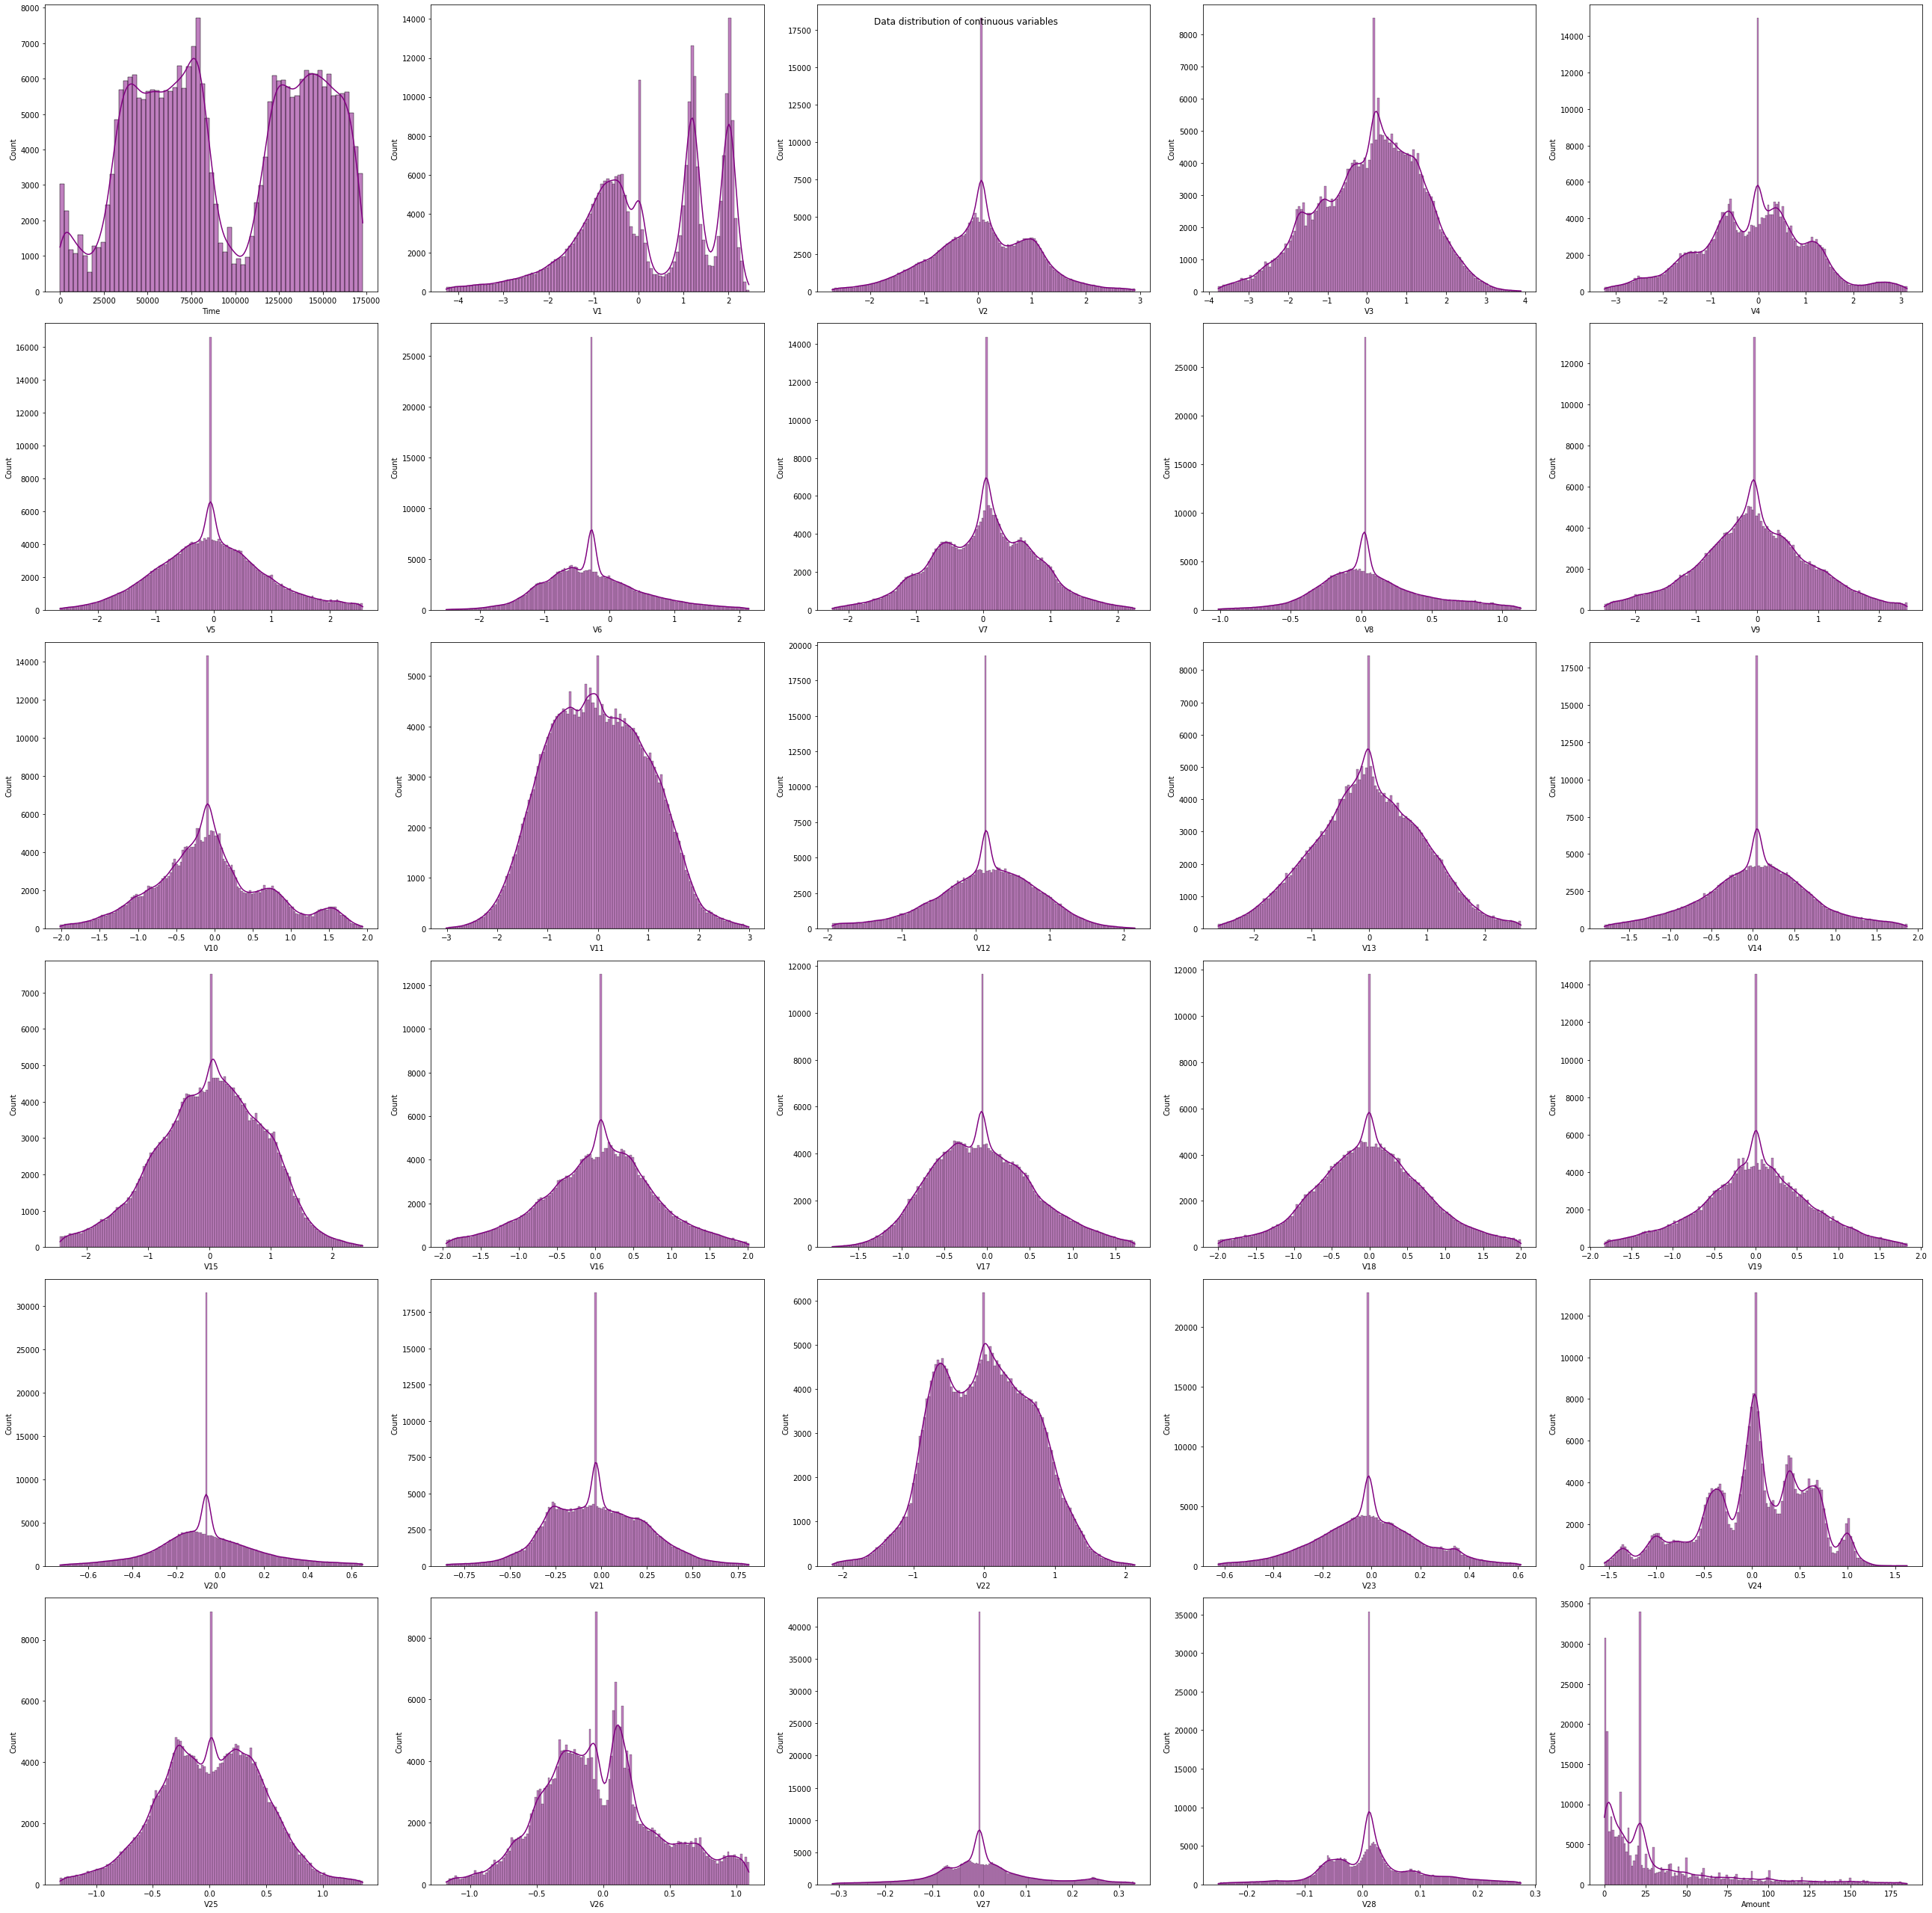

In [22]:
#Histplot of all variables after outlier treatment
plt.figure(figsize=(36, 36))
for i, col in enumerate(credit.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white' 
    ax = plt.subplot(6,5, i+1)
    sns.histplot(data=credit, x=col, ax=ax,color='purple',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### Feature Correlation

In [23]:
#creating a correlation matrix
credit_corr = credit.corr()
credit_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.154977,-0.018174,-0.478387,-0.174296,0.205830,-0.112719,0.112428,-0.106256,0.008566,...,0.112798,0.148126,0.158034,-0.009567,-0.243656,-0.028417,-0.035010,-0.122795,-0.023705,-0.012323
V1,0.154977,1.000000,-0.399904,-0.397308,0.121812,-0.130815,-0.075188,-0.245487,-0.203567,0.147437,...,-0.057074,-0.043699,0.171678,0.002362,0.078599,-0.005852,-0.127970,-0.220779,0.008919,-0.023371
V2,-0.018174,-0.399904,1.000000,0.067647,0.179976,0.347567,-0.096804,0.452813,0.001725,-0.052022,...,-0.081941,-0.047925,-0.091084,0.010729,-0.084864,0.023396,0.146175,0.148132,-0.275851,0.024743
V3,-0.478387,-0.397308,0.067647,1.000000,0.070150,-0.240684,0.277579,-0.094380,0.174096,-0.015829,...,-0.055583,-0.008335,-0.155339,-0.007748,0.017337,-0.017700,0.173098,0.183372,0.039736,-0.014984
V4,-0.174296,0.121812,0.179976,0.070150,1.000000,0.021003,0.134294,0.077995,-0.023717,0.149272,...,0.019698,-0.027330,0.008492,-0.004354,0.062551,-0.074235,-0.031796,0.012993,-0.033266,0.024036
V5,0.205830,-0.130815,0.347567,-0.240684,0.021003,1.000000,-0.128756,0.427959,-0.016854,-0.039927,...,-0.040464,-0.009302,-0.108299,-0.029159,0.004105,0.009928,0.031069,-0.001640,-0.149366,-0.008324
V6,-0.112719,-0.075188,-0.096804,0.277579,0.134294,-0.128756,1.000000,-0.267023,0.380573,0.043323,...,0.041979,0.063660,-0.052006,-0.310700,-0.049338,-0.017327,0.079487,0.030234,0.113966,-0.026420
V7,0.112428,-0.245487,0.452813,-0.094380,0.077995,0.427959,-0.267023,1.000000,-0.368238,-0.073518,...,-0.019521,-0.021005,-0.194689,-0.014188,-0.030706,0.014390,-0.063522,0.082516,-0.094963,-0.009191
V8,-0.106256,-0.203567,0.001725,0.174096,-0.023717,-0.016854,0.380573,-0.368238,1.000000,0.004072,...,0.053807,0.011709,0.059521,-0.007403,-0.068643,-0.011047,0.173427,0.090177,0.045492,0.006375
V9,0.008566,0.147437,-0.052022,-0.015829,0.149272,-0.039927,0.043323,-0.073518,0.004072,1.000000,...,-0.058877,0.009837,0.068620,0.001714,-0.028990,0.025700,-0.023673,-0.096676,-0.049100,-0.020085


<AxesSubplot:>

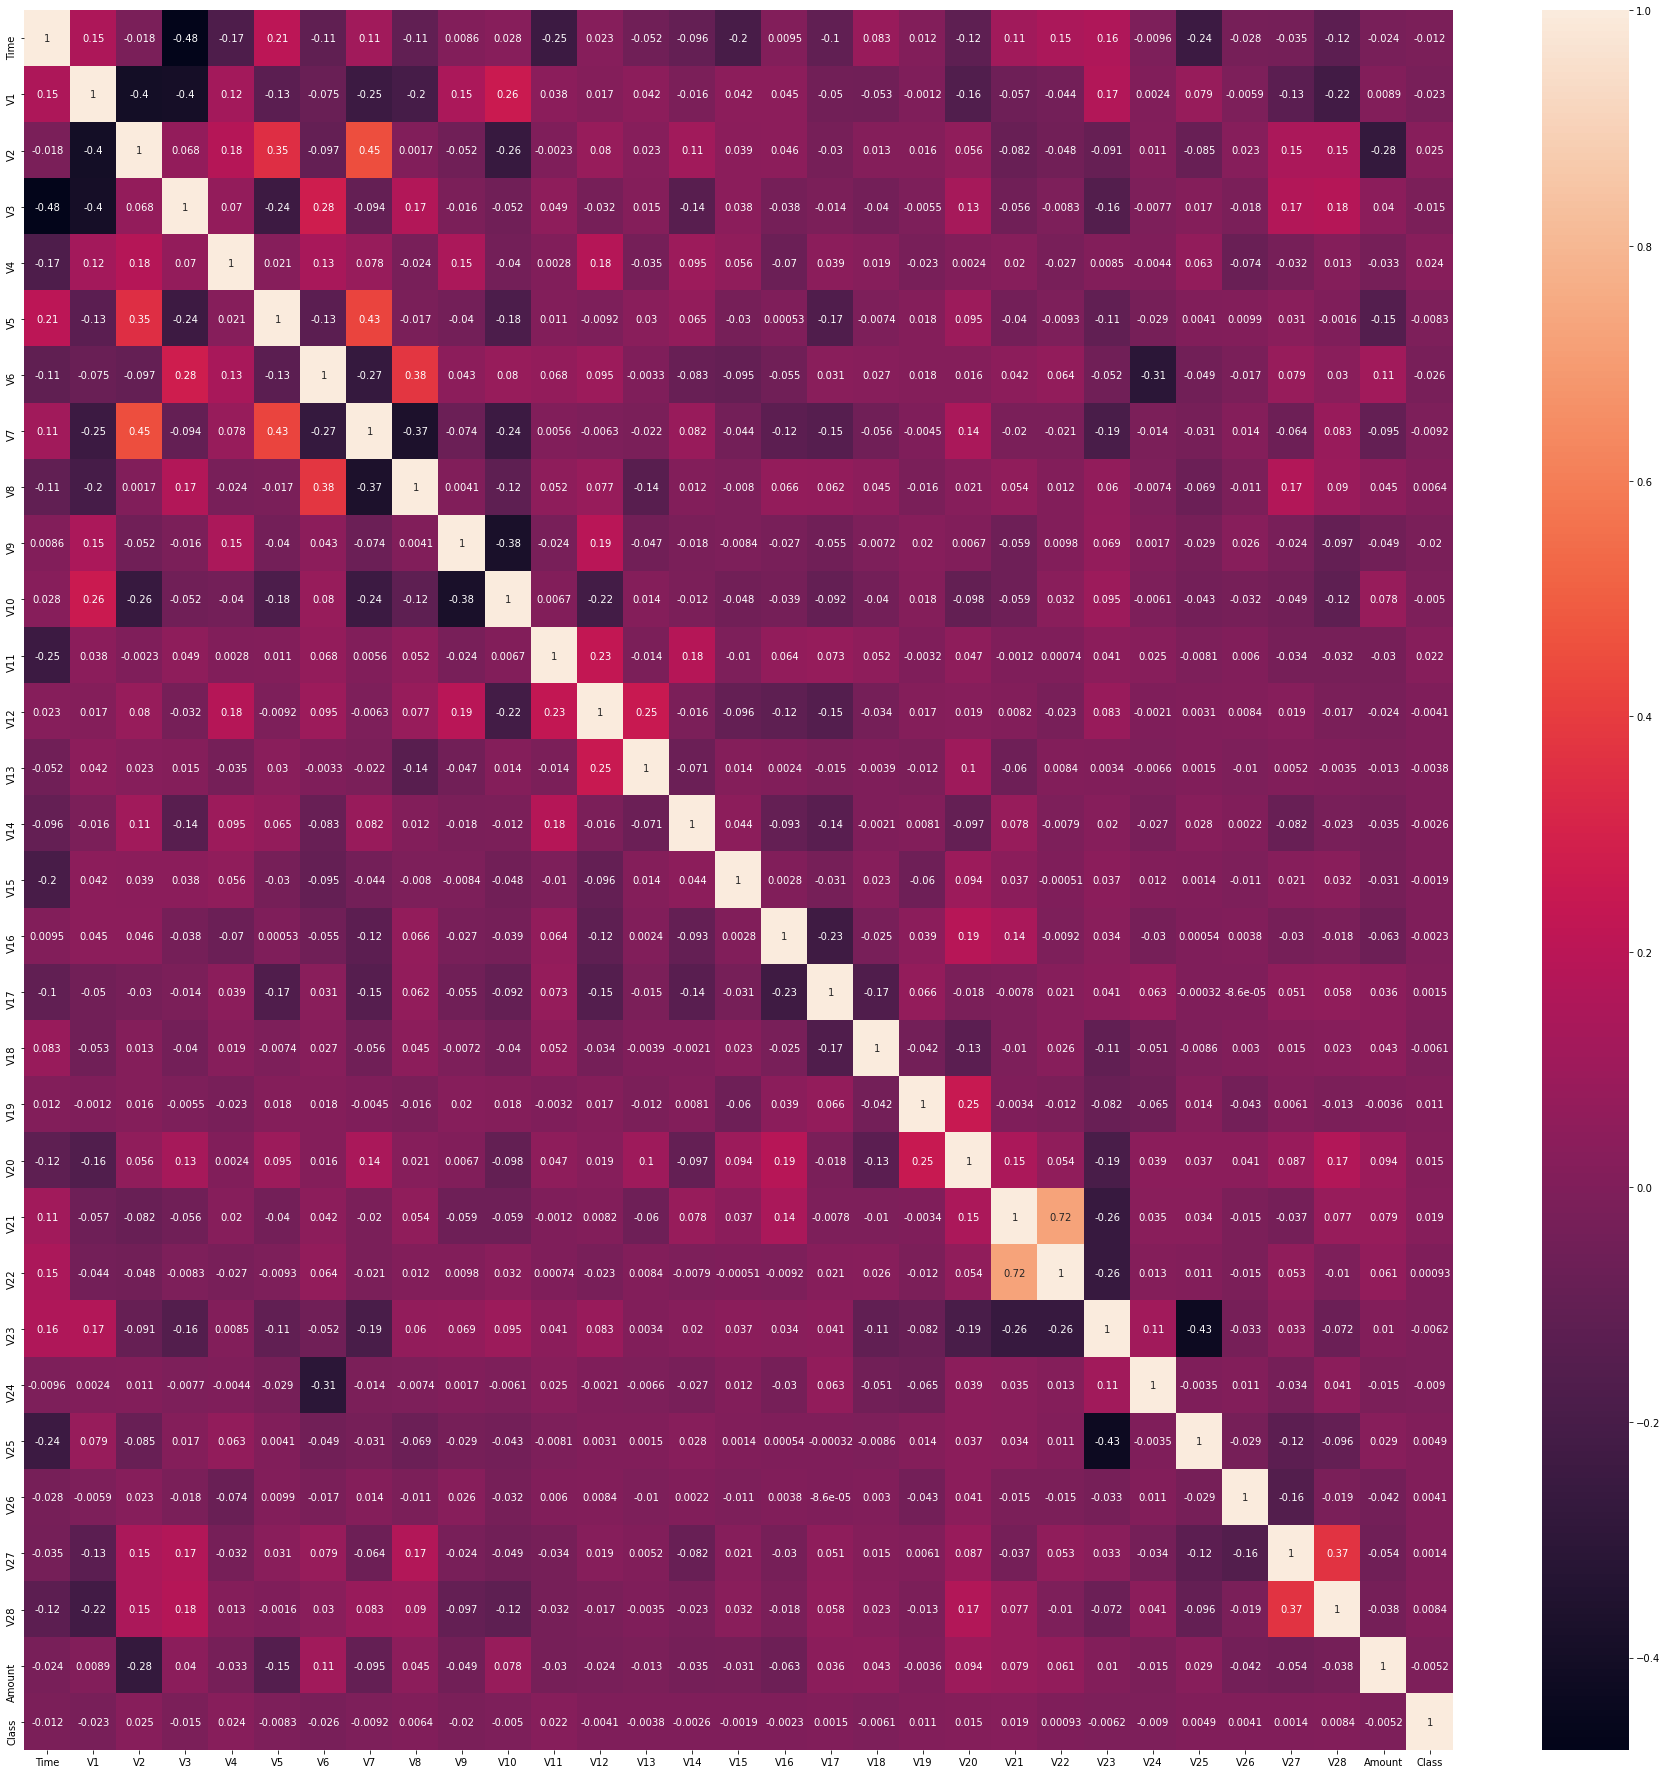

In [24]:
#Plotting a heat map
plt.figure(figsize=(32, 32))

sns.heatmap(credit_corr, annot = True)

In [ ]:
sns.heatmap()

#### Feature Scaling

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

credit['scaled_time'] = rob_scaler.fit_transform(credit['Time'].values.reshape(-1,1))
credit['scaled_amount'] = rob_scaler.fit_transform(credit['Amount'].values.reshape(-1,1))

credit.drop([['Time', 'Amount']], axis=1, inplace=True)

In [ ]:
credit.head()

In [ ]:
scaled_time = credit['scaled_time']
scaled_amount = credit['scaled_amount']

credit.drop([['scaled_time', 'scaled_amount']], axis=1, inplace=True)
credit.insert(0, 'scaled_time', scaled_time)
credit.insert(1, 'scaled_amount', scaled_amount)

#Time and amount are Scaled!

credit.head()

### Class Balancing 

In [25]:
#checking the percentage distribution of the target variable
print('No Fraud', round(credit['Class'].value_counts()[0]/len(credit) * 100,2), '% of the dataset')
print('Fraud', round(credit['Class'].value_counts()[1]/len(credit) * 100,2), '% of the dataset')

No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset


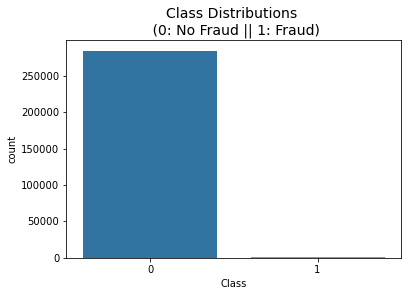

In [26]:
#visualizing the distribution
sns.countplot(x="Class", data=credit) 
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [ ]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

In [27]:
#assigning values
X = credit.drop(['Class'], axis = 1)
y = credit.Class

In [28]:
#importing library for splitting
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [29]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

# make prediction
pred = lr.predict(X_test)

# check performance 
accuracy_score(pred,y_test)

0.9980103694860901

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.00      0.00      0.00       153

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



### Feature Selection with FeatureWiz

Imported 0.1.993 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg 

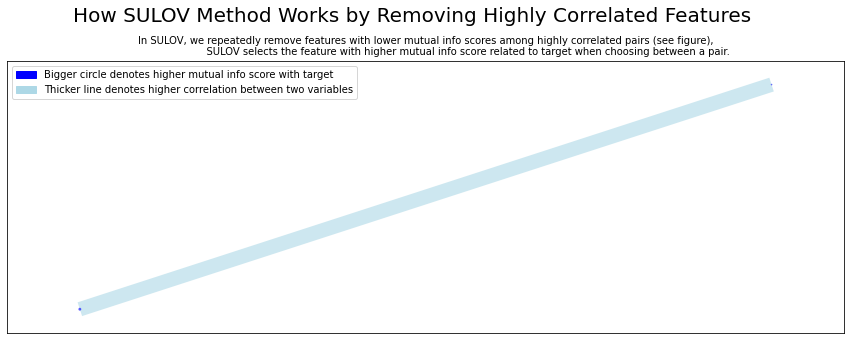

Time taken for SULOV method = 4 seconds
    Adding 0 categorical variables to reduced numeric variables  of 29
Final list of selected 29 vars after SULOV = ['Amount', 'Time', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V21']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 29 
    Taking top 7 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 20
        using 29 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
  

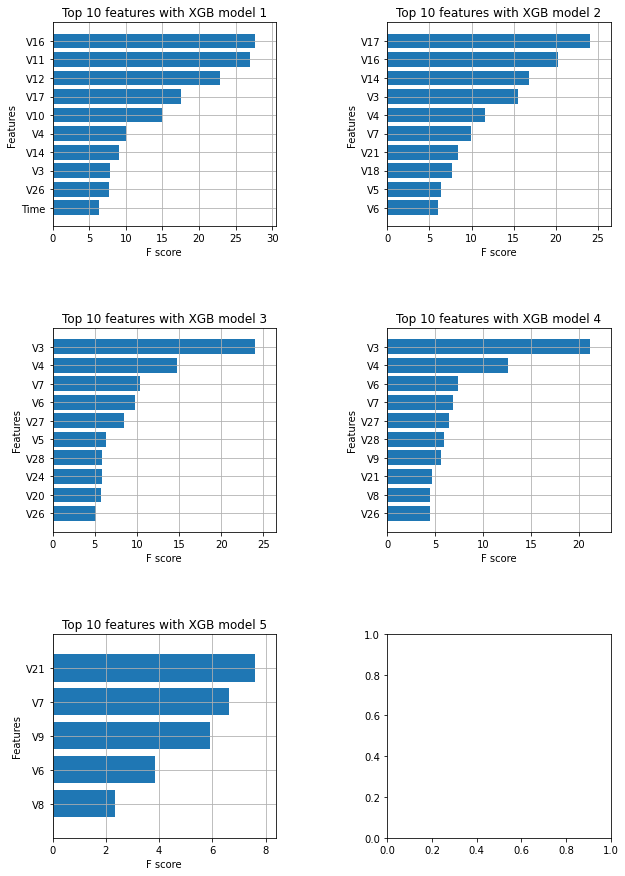

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 16 important features:
['V16', 'V11', 'V12', 'V17', 'V10', 'V4', 'V14', 'V3', 'V7', 'V21', 'V6', 'V27', 'V5', 'V28', 'V9', 'V8']
Total Time taken for featurewiz selection = 9 seconds
Output contains a list of 16 important features and a train dataframe
    Time taken to create entire pipeline = 11 second(s)


['V16',
 'V11',
 'V12',
 'V17',
 'V10',
 'V4',
 'V14',
 'V3',
 'V7',
 'V21',
 'V6',
 'V27',
 'V5',
 'V28',
 'V9',
 'V8']

In [32]:
from featurewiz import FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', 
                      dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train, y_train)
X_test_selected = features.transform(X_test)
features.features  ### provides the list of selected features ###

In [33]:
X_train_selected.head()

,V16,V11,V12,V17,V10,V4,V14,V3,V7,V21,V6,V27,V5,V28,V9,V8
64454,0.530014,0.469895,-1.170292,1.516968,-0.092917,-0.573050,0.050601,-1.827130,2.102135,0.530978,-0.340988,-0.023636,-0.054336,0.011244,-0.051429,0.022358
37906,-0.844019,1.257913,-0.161244,0.173619,0.629036,1.118934,0.260308,1.648195,0.472790,0.687055,0.423852,-0.186814,0.100882,0.011244,0.033833,-0.972440
79378,-0.104751,-0.904320,-0.341810,0.101689,-0.185059,0.780864,0.193059,0.622612,-0.206073,-0.310405,-0.706444,-0.036764,-0.823511,0.015039,0.781531,-0.016918
245686,-0.916659,1.253511,0.986015,0.130676,-0.051983,0.200475,0.737555,-1.594982,-0.034071,0.519029,0.832370,0.005387,0.502985,-0.057296,0.550616,0.234040
60943,0.342296,-1.309417,0.704059,-0.717449,-0.185599,-0.059077,-0.334923,0.662450,-1.430571,-0.228329,-0.274187,0.001342,-0.054336,0.161782,0.469383,-0.118450


In [34]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_selected, y_train)

# make prediction 
preds = lr.predict(X_test_selected)

# check performance 
accuracy_score(preds,y_test)

0.9982093325374811

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.50      0.03      0.06       153

    accuracy                           1.00     85443
   macro avg       0.75      0.52      0.53     85443
weighted avg       1.00      1.00      1.00     85443



#### Dropping Unselected Features

In [36]:
X = pd.concat([X_train_selected, X_test_selected], axis = 0)
y = y

### Oversampling and Undersampling with SMOTE

In [37]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn import metrics
from matplotlib import pyplot

In [38]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

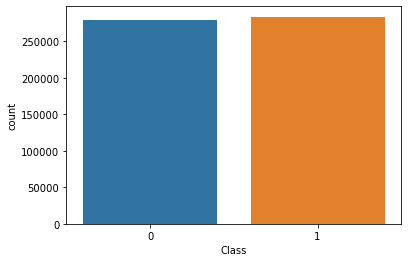

In [39]:
sns.countplot(y_resampled)
plt.show()

In [40]:
from collections import Counter

counter = Counter(y_resampled)
print(counter)

<AxesSubplot:xlabel='V6', ylabel='V17'>

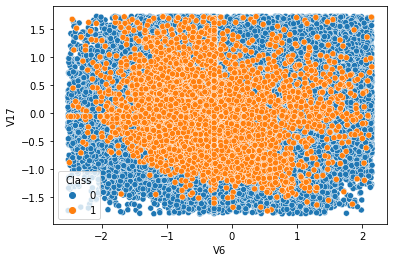

In [42]:
sns.scatterplot(
    data=X, x="V6", y="V17", hue=y_resampled,
    sizes=(40, 200), legend="full")

In [43]:
from sklearn.model_selection import train_test_split

# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 235)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (394165, 16)
Number transactions y_train dataset:  (394165,)
Number transactions X_test dataset:  (168929, 16)
Number transactions y_test dataset:  (168929,)


In [44]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [45]:
# logistic regression object
classifier = LogisticRegression()

# train the model on train set
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print("Test_score : ", accuracy_score(y_test, pred))
# print classification report
print(classification_report(y_test, pred))

model_comparison['Logistic Regression'] = [accuracy_score(y_test, pred),f1_score(y_test,pred, average='weighted')]

Test_score :  0.5443707119559105
              precision    recall  f1-score   support

           0       0.55      0.48      0.51     83727
           1       0.54      0.60      0.57     85202

    accuracy                           0.54    168929
   macro avg       0.54      0.54      0.54    168929
weighted avg       0.54      0.54      0.54    168929



In [46]:
# train the model on train set
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# make prediction 
pred = classifier.predict(X_test)
 
print("Test_score : ", accuracy_score(y_test, pred))

# print classification report
print(classification_report(y_test, pred))

model_comparison['Decision Tree'] = [accuracy_score(y_test, pred),f1_score(y_test,pred, average='weighted')]

Test_score :  0.9854613476667713
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     83727
           1       0.98      0.99      0.99     85202

    accuracy                           0.99    168929
   macro avg       0.99      0.99      0.99    168929
weighted avg       0.99      0.99      0.99    168929



In [47]:
Classifier = RandomForestClassifier()
Classifier.fit(X_train, y_train)

# make prediction 
pred = Classifier.predict(X_test)
# check performance 
print("Test_score : ", accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

model_comparison['Random Forest'] = [accuracy_score(y_test, pred),f1_score(y_test,pred, average='weighted')]

Test_score :  0.9992955620408575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83727
           1       1.00      1.00      1.00     85202

    accuracy                           1.00    168929
   macro avg       1.00      1.00      1.00    168929
weighted avg       1.00      1.00      1.00    168929



In [48]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# make prediction 
pred = classifier.predict(X_test)

print("Test_score : ", accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

model_comparison['Naive Bayes'] = [accuracy_score(y_test, pred),f1_score(y_test,pred, average='weighted')]

Test_score :  0.6087883075138075
              precision    recall  f1-score   support

           0       0.62      0.56      0.58     83727
           1       0.60      0.66      0.63     85202

    accuracy                           0.61    168929
   macro avg       0.61      0.61      0.61    168929
weighted avg       0.61      0.61      0.61    168929



In [49]:
#Create a svm Classifier
classifier  = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
classifier.fit(X_train, y_train)

#Predict the response for test dataset
pred = classifier .predict(X_test)

print("Test_score : ", accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

model_comparison['SVM'] = [accuracy_score(y_test, pred),f1_score(y_test,pred, average='weighted')]

Test_score :  0.553279780262714
              precision    recall  f1-score   support

           0       0.57      0.39      0.46     83727
           1       0.54      0.72      0.62     85202

    accuracy                           0.55    168929
   macro avg       0.56      0.55      0.54    168929
weighted avg       0.56      0.55      0.54    168929



In [51]:
Model_res=pd.DataFrame(model_comparison).T
Model_res.columns=['Model Accuracy','Model F1-Score']
Model_res=Model_res.sort_values(by='Model F1-Score',ascending=False)
Model_res.style.format("{:.2%}").background_gradient(cmap='Blues')

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.3' currently installed).

In [53]:
#creating dictionary for storing different models accuracy
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['rf'] = RandomForestClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [54]:
#The evaluate_model() function below takes a model 
#instance and returns a list of scores from three 
#repeats of stratified 10-fold cross-validation.

def evaluate_model(model,X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=14)
    scoring=['accuracy','precision_macro','recall_macro','roc_auc', 'f1']
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
# get the models to evaluate
models = get_models() # Retrieve all the models and store them in "models"
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train) # use the cross validation function
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.562 (0.003)
